In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cmocean.cm as cmo
#plt.rcParams['figure.facecolor'] = 'white'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
ems = xr.open_mfdataset("../data_for_plots/eddymasks_example.nc")

OSError: no files to open

In [4]:
ems_baro = ems.emOW03.expand_dims(dim={"z": ems.z}).isel(lon=200)
ems_clinic = ems.em3D.isel(lon=200)

In [5]:
OW = xr.open_mfdataset("../data_for_plots/OkuboWeiss_example.nc")
SSH = xr.open_mfdataset("../data_for_plots/SSH_example.nc")
UV = xr.open_mfdataset("../data_for_plots/UV_example.nc")

In [6]:
VEL = np.sqrt(UV.UVEL**2 + UV.VVEL**2)

In [7]:
dummy = xr.open_mfdataset("../data_for_plots/MOC_res_z_0201-01-01_0300-12-30.nc").rename({"Z": "z", "YG": "lat"})
shelf = (dummy.MOC_res_z/dummy.MOC_res_z)

/home/jan/miniconda3/envs/eddytools/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jan/miniconda3/envs/eddytools/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jan/miniconda3/envs/eddytools/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2021: UserWarning: No contour levels were found within the data range.
  primitive = ax.contour(x, y, z, **kwargs)


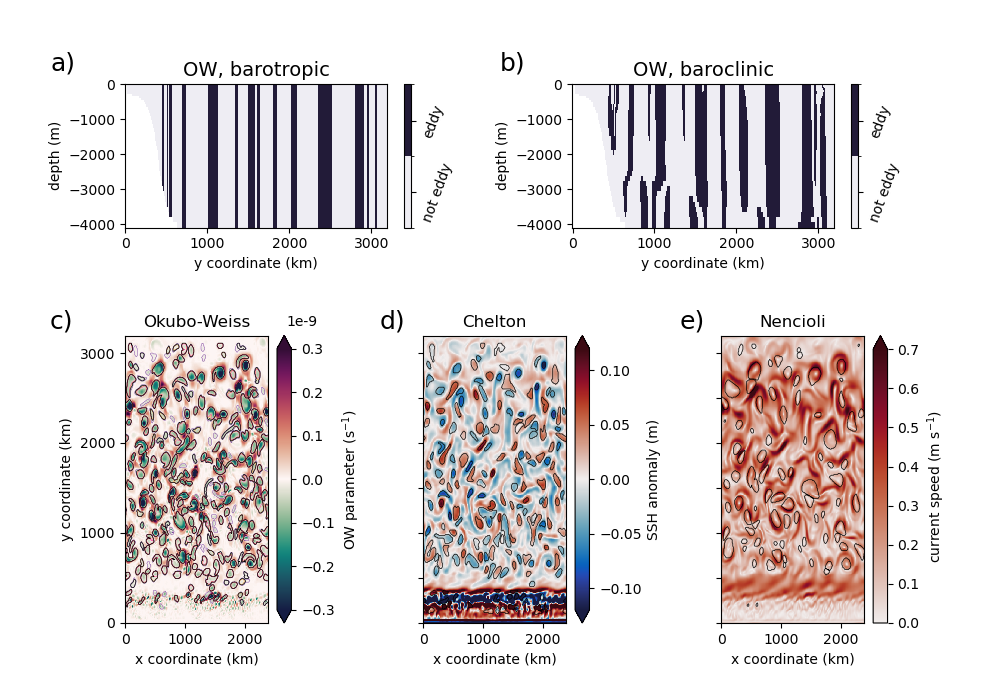

In [8]:
fig = plt.figure(figsize=(10, 7))

gs = fig.add_gridspec(2, 6, height_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, 0:3])
p1 = ems_baro.where(shelf==1).plot(ax=ax1, vmin=0, vmax=1.01, levels=3, cmap=cmo.rain, add_colorbar=False)
ax1.set_title(r"OW, barotropic", fontsize=14)
ax1.set_xticks(np.arange(0.0e6, 3.2e6, 1.0e6))
ax1.set_xticklabels(np.arange(0, 3200, 1000))
ax1.set_xlabel("y coordinate (km)")
ax1.set_ylabel("depth (m)")
cbar = plt.colorbar(p1, ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(["not eddy", "eddy"], rotation=70, va="center")

ax2 = fig.add_subplot(gs[0, 3::])
p2 = ems_clinic.where(shelf==1).plot(ax=ax2, vmin=0, vmax=1.01, levels=3, cmap=cmo.rain, add_colorbar=False)
ax2.set_title(r"OW, baroclinic", fontsize=14)
ax2.set_xticks(np.arange(0.0e6, 3.2e6, 1.0e6))
ax2.set_xticklabels(np.arange(0, 3200, 1000))
ax2.set_xlabel("y coordinate (km)")
ax2.set_ylabel("depth (m)")
cbar = plt.colorbar(p2, ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(["not eddy", "eddy"], rotation=70, va="center")

ax3 = fig.add_subplot(gs[1, 0:2])
p3 = (OW.OW * 1e9).plot(ax=ax3, vmin=-0.3, vmax=0.3, cmap=cmo.curl, cbar_kwargs={"label": r"OW parameter (s$^{-1}$)"})
m3 = ems.emOW02.plot.contour(colors="indigo", linewidths=0.25, levels=[1])
m3 = ems.emOW04.plot.contour(colors="darkorange", linewidths=0.25, levels=[1])
m3 = ems.emOW05.plot.contour(colors="deeppink", linewidths=0.25, levels=[1])
m3 = ems.emOW03.plot.contour(colors="k", linewidths=0.5, levels=[1])
ax3.set_xticks(np.arange(0.0e6, 2.4e6, 1.0e6))
ax3.set_xticklabels(np.arange(0, 2400, 1000))
ax3.set_xlabel("x coordinate (km)")
ax3.set_yticks(np.arange(0.0e6, 3.2e6, 1.0e6))
ax3.set_yticklabels(np.arange(0, 3200, 1000))
ax3.set_ylabel("y coordinate (km)")
ax3.set_title("Okubo-Weiss")
ax3.text(2.7e6, 3.3e6, "1e-9")

ax4 = fig.add_subplot(gs[1, 2:4])
p4 = SSH.ETAN.plot(ax=ax4, vmin=-0.12, vmax=0.12, cmap=cmo.balance, cbar_kwargs={"label": r"SSH anomaly (m)"})
m4 = ems.emSSH.plot.contour(ax=ax4, colors="k", linewidths=0.5, levels=[1])
ax4.set_xticks(np.arange(0.0e6, 2.4e6, 1.0e6))
ax4.set_xticklabels(np.arange(0, 2400, 1000))
ax4.set_xlabel("x coordinate (km)")
ax4.set_yticklabels([])
ax4.set_ylabel("")
ax4.set_title("Chelton")

ax5 = fig.add_subplot(gs[1, 4:6])
p5 = VEL.plot(ax=ax5, vmin=0, vmax=0.7, cmap=cmo.amp, cbar_kwargs={"label": r"current speed (m s$^{-1}$)"})
m5 = ems.emUV.plot.contour(ax=ax5, colors="k", linewidths=0.5, levels=[1])
ax5.set_xticks(np.arange(0.0e6, 2.4e6, 1.0e6))
ax5.set_xticklabels(np.arange(0, 2400, 1000))
ax5.set_xlabel("x coordinate (km)")
ax5.set_yticklabels([])
ax5.set_ylabel("")
ax5.set_title("Nencioli")

plt.subplots_adjust(hspace=0.5, wspace=4)

fig.text(0.05, 0.9, "a)", fontsize=18)
fig.text(0.5, 0.9, "b)", fontsize=18)
fig.text(0.05, 0.53, "c)", fontsize=18)
fig.text(0.38, 0.53, "d)", fontsize=18)
fig.text(0.68, 0.53, "e)", fontsize=18)

plt.savefig("figS02-eddymask_examples.png", dpi=600)